In [1]:
import pandas as pd
import numpy as np
import pymongo
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm 

%matplotlib inline

In [177]:
mongo_url = 'mongodb+srv://hughkohl:' + '*Tiger13' + '@cluster0-bdg3q.azure.mongodb.net/test?retryWrites=true&w=majority'

cluster = pymongo.MongoClient(mongo_url)
db = cluster["job_scrape"]
collection = db["jobs"]

In [178]:
mongo_docs = collection.find()
df = pd.DataFrame(list(mongo_docs))

In [179]:
# drop nonessentials
df.drop(['date', '_id', 'url'], axis=1, inplace=True)

In [180]:
df = df.loc[df.duplicated()==False]

In [181]:
# clean job role column to replace + with _  and description column to lowercase
df['job'] = df['job'].str.replace('+', '_', True)
df['description'] = df['description'].str.lower()
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df.groupby('job').count()

,role,company,description
job,,,
account_executive,78,78,78
business_analyst,98,98,98
consultant,261,261,261
customer_success,376,376,376
data_analyst,79,79,79
data_engineer,320,320,320
data_scientist,76,76,76
developer,204,204,204
human_resources,95,95,95


In [63]:
df_ae = df.query('job == "account_executive"')
df_ba  = df.query('job == "business_analyst"')
df_c  = df.query('job == "constultant"')
df_cs  = df.query('job == "customer_success"').iloc[:120]
df_da  = df.query('job == "data_analyst"')
df_de  = df.query('job == "data_engineer"').iloc[:120]
df_ds  = df.query('job == "data_scientist"')
df_dev  = df.query('job == "developer"')
df_hr  = df.query('job == "human_resources"')
df_pm  = df.query('job == "product_manager"')
df_pjm  = df.query('job == "project_manager"')
df_se  = df.query('job == "software_engineer"').iloc[:120]
df_sa  = df.query('job == "solutions_architect"')
df_sole  = df.query('job == "solutions_engineer"').iloc[:120]

In [64]:
df_ae = df_ae.append(df_ba)
df_ae =  df_ae.append(df_c)
df_ae = df_ae.append(df_cs)
df_ae = df_ae.append(df_da)
df_ae = df_ae.append(df_de)
df_ae = df_ae.append(df_ds)
df_ae = df_ae.append(df_dev)
df_ae = df_ae.append(df_hr)
df_ae = df_ae.append(df_pm)
df_ae = df_ae.append(df_pjm)
df_ae = df_ae.append(df_se)
df_ae = df_ae.append(df_sa)
df_ae = df_ae.append(df_sole)

In [68]:
df = df_ae
df = df.reset_index()

In [69]:
df.drop('index', axis=1, inplace=True)

In [156]:
df.head()

,job,role,company,description
0,solutions_engineer,Solutions Engineer,Pinterest,millions of people across the world come to pi...
1,solutions_engineer,Data Engineer (NCMEC),Thorn,thorn is a non-profit focused on building tech...
2,solutions_engineer,Application Design Engineer,Devotion Business Solutions,job description job description our client is ...
3,solutions_engineer,Manufacturing Engineer,Lithos Energy,who are we?\nlithos energy designs and builds ...
4,solutions_engineer,DevOps engineer,MoData,main requirements:\nexperience in deploying an...


In [182]:
interpersonal_skills = ['leadership', 'public speaking', 'present', 'writing', 'negotiat', 'problem solving', 'hypothesis', 
                        'decisi', 'communication','emotional intelligence', 'empath', 'collaboration', 'facilitat', 'motivation', 
                        'driven', 'self-starter', 'creativ', 'work ethic', 'teamwork', 'network', 'time management', 'motivat', 
                        'critical thinking', 'story telling', 'verbal', 'listen', 'organiz', 'prioritiz', 'interpersonal']

In [183]:
# ONLY RUN ONCE
for skill in interpersonal_skills:
    df[skill] = 0

In [184]:
df.shape

(2457, 33)

In [185]:
#  industry skills +1 if exists in description
for i in range((df.shape[0])):
    for skill in interpersonal_skills:
        try:
            if skill in df['description'][i]:
                df[skill][i] += 1
        except:
            pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [161]:
df.head()

,job,role,company,description,leadership,public speaking,present,writing,negotiat,problem solving,...,networking,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
0,solutions_engineer,Solutions Engineer,Pinterest,millions of people across the world come to pi...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,solutions_engineer,Data Engineer (NCMEC),Thorn,thorn is a non-profit focused on building tech...,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,solutions_engineer,Application Design Engineer,Devotion Business Solutions,job description job description our client is ...,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,solutions_engineer,Manufacturing Engineer,Lithos Energy,who are we?\nlithos energy designs and builds ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,solutions_engineer,DevOps engineer,MoData,main requirements:\nexperience in deploying an...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df_2 = df.groupby('job').sum()

              index  business_analyst
0     communication                77
1           organiz                56
2        leadership                36
3            decisi                35
4            verbal                32
5           present                31
6         prioritiz                28
7           motivat                24
8            driven                23
9     interpersonal                22
10          creativ                17
11    collaboration                17
12  problem solving                17
13        facilitat                15
14          writing                 9


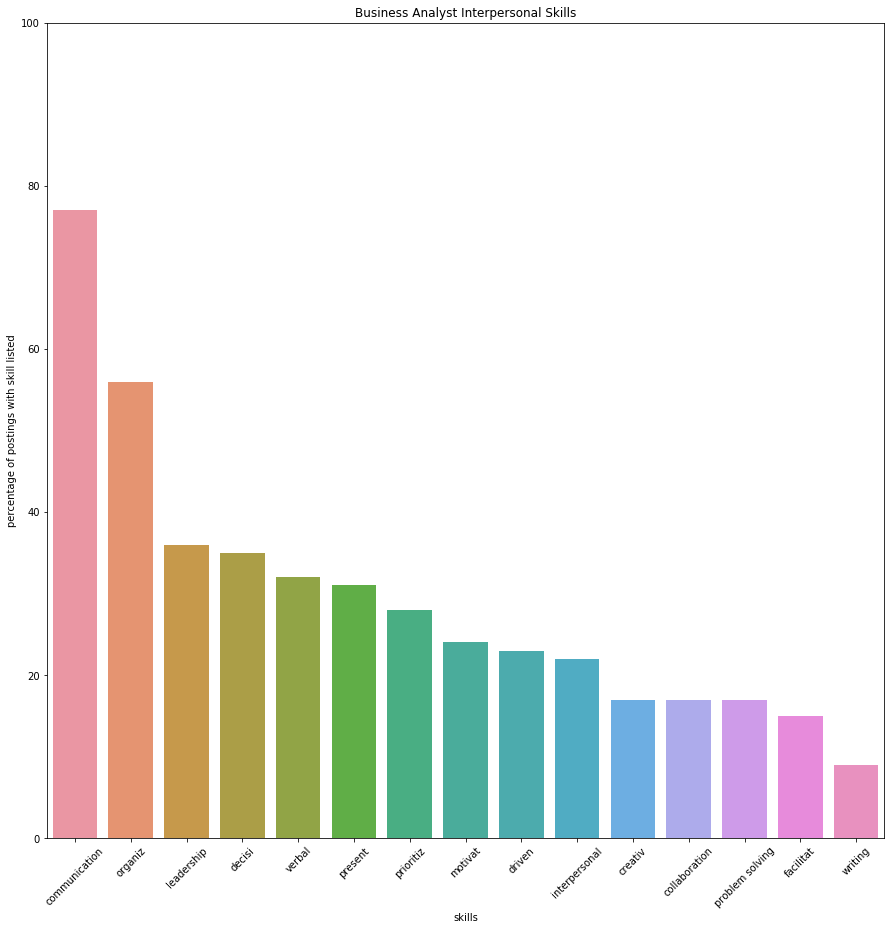

In [186]:
df_ba = df_perc.loc['business_analyst'].sort_values(ascending=False).head(15)
df_ba = df_ba.reset_index()

print(df_ba)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=45);
sns.barplot(x='index', y='business_analyst', ax=ax, data=df_ba);
plt.title('Business Analyst Interpersonal Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

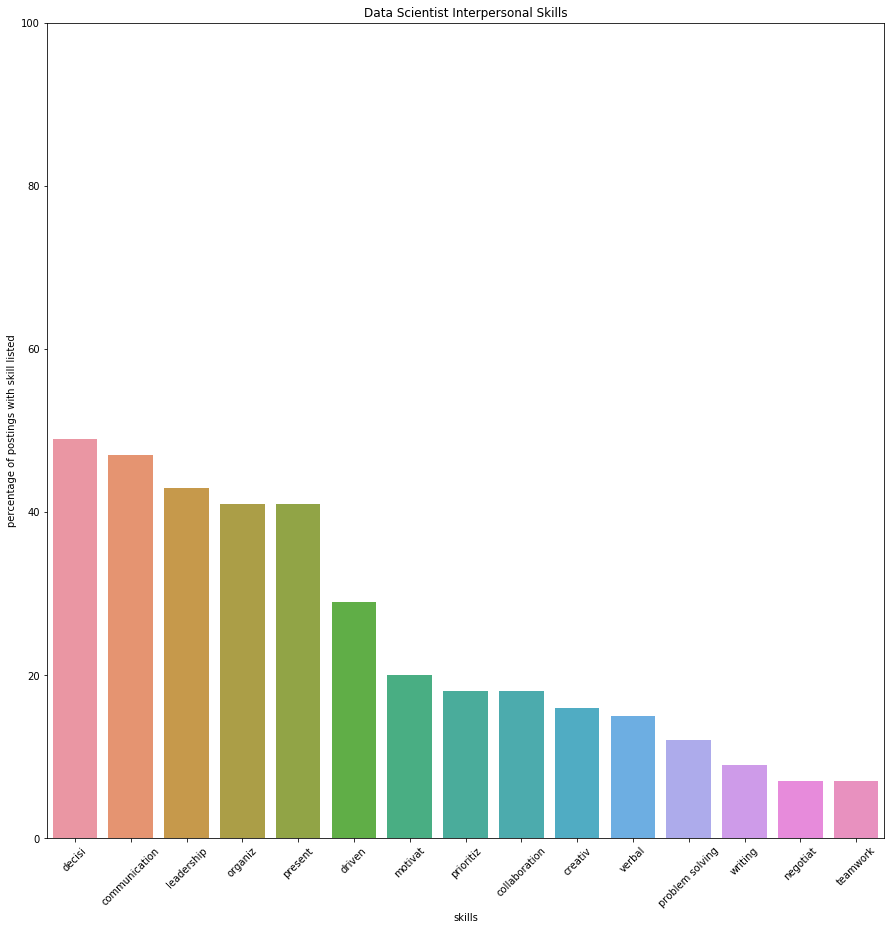

In [187]:
df_ds = df_perc.loc['data_scientist'].sort_values(ascending=False).head(15)
df_ds = df_ds.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='data_scientist', ax=ax, data=df_ds)
plt.xticks(rotation=45);
plt.title('Data Scientist Interpersonal Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

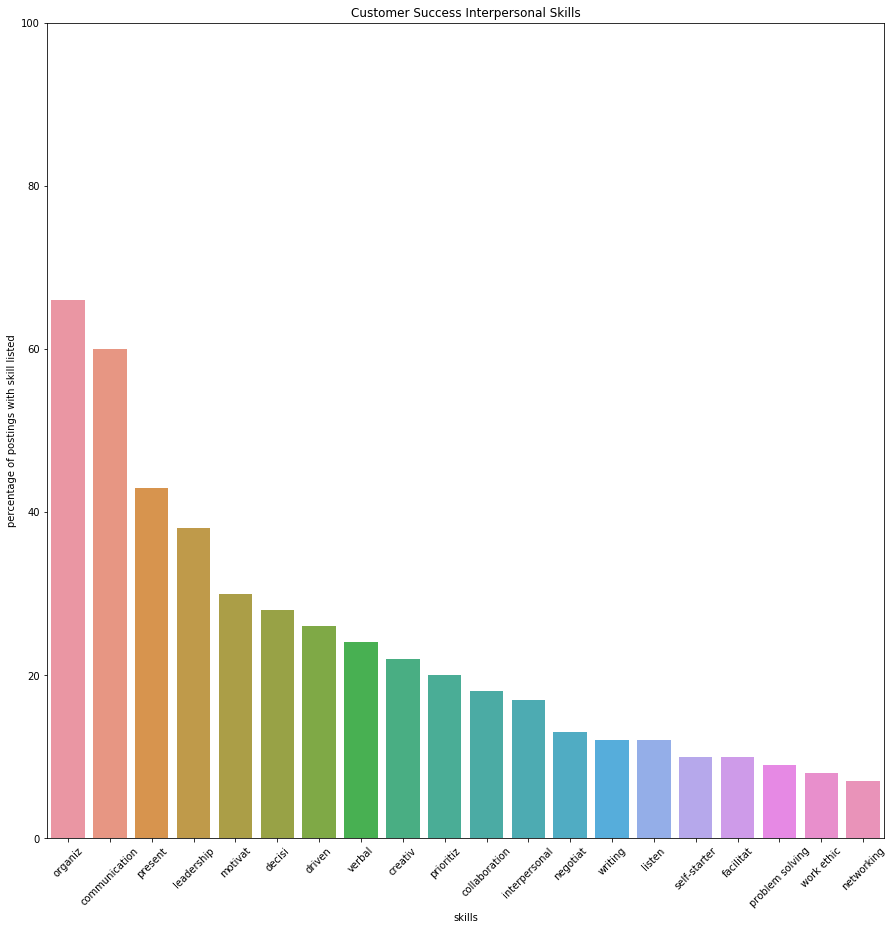

In [188]:
df_cs = df_perc.loc['customer_success'].sort_values(ascending=False).head(20)
df_cs = df_cs.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='customer_success', ax=ax, data=df_cs)
plt.xticks(rotation=45);
plt.title('Customer Success Interpersonal Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

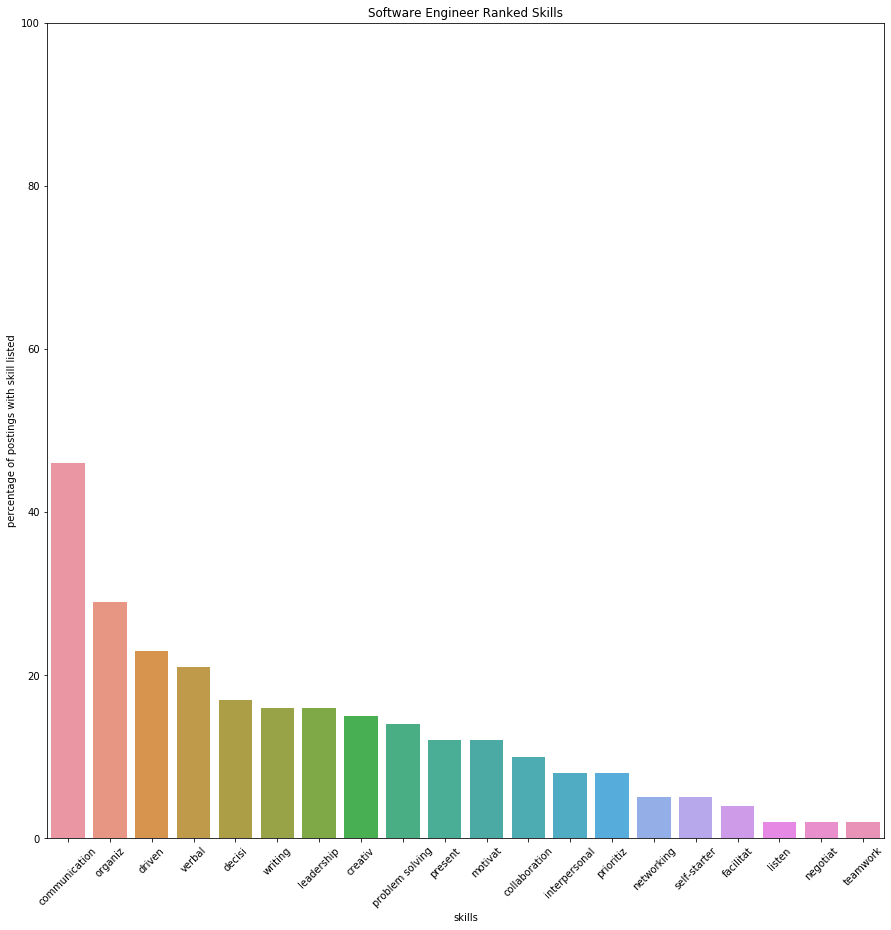

In [189]:
df_se = df_perc.loc['software_engineer'].sort_values(ascending=False).head(20)
df_se = df_se.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='software_engineer', ax=ax, data=df_se)
plt.xticks(rotation=45);
plt.title('Software Engineer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

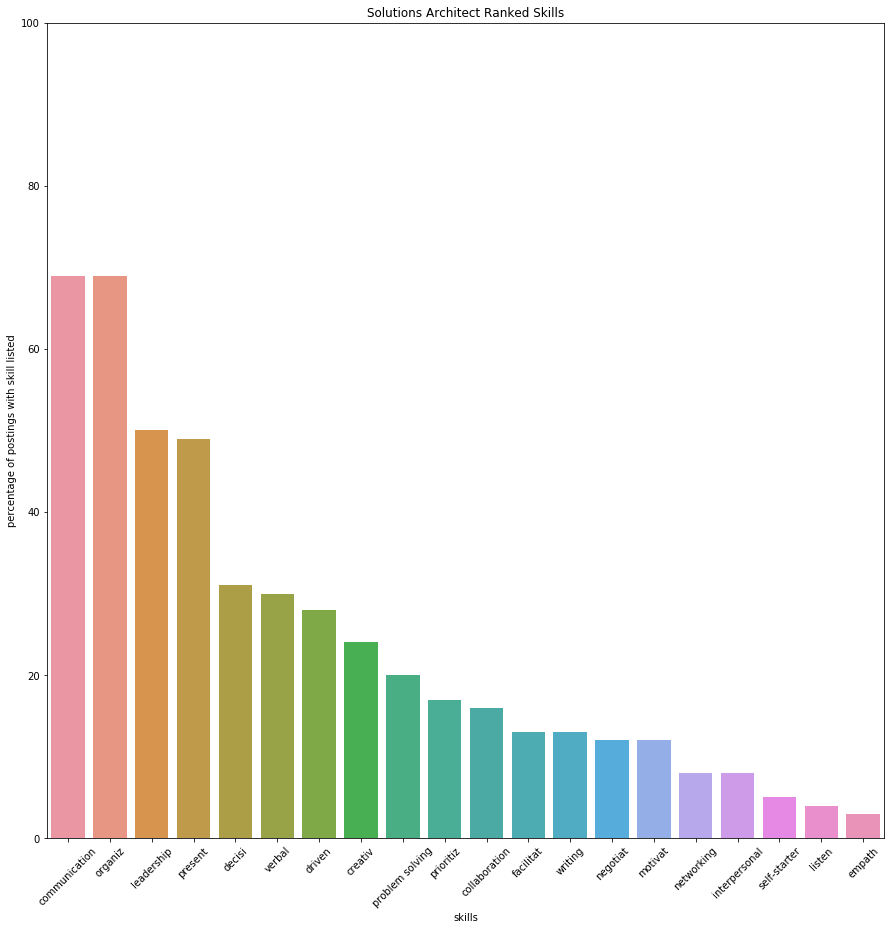

In [190]:

df_sa = df_perc.loc['solutions_architect'].sort_values(ascending=False).head(20)
df_sa = df_sa.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='solutions_architect', ax=ax, data=df_sa)
plt.xticks(rotation=45);
plt.title('Solutions Architect Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

              index  developer
0     communication         51
1           organiz         25
2            verbal         22
3            driven         21
4           creativ         17
5            decisi         17
6        leadership         16
7           writing         14
8     collaboration         14
9   problem solving         13
10          motivat         10
11          present         10
12    interpersonal          9
13        prioritiz          8
14       networking          7
15     self-starter          5
16        facilitat          4
17           empath          3
18         teamwork          2
19           listen          1


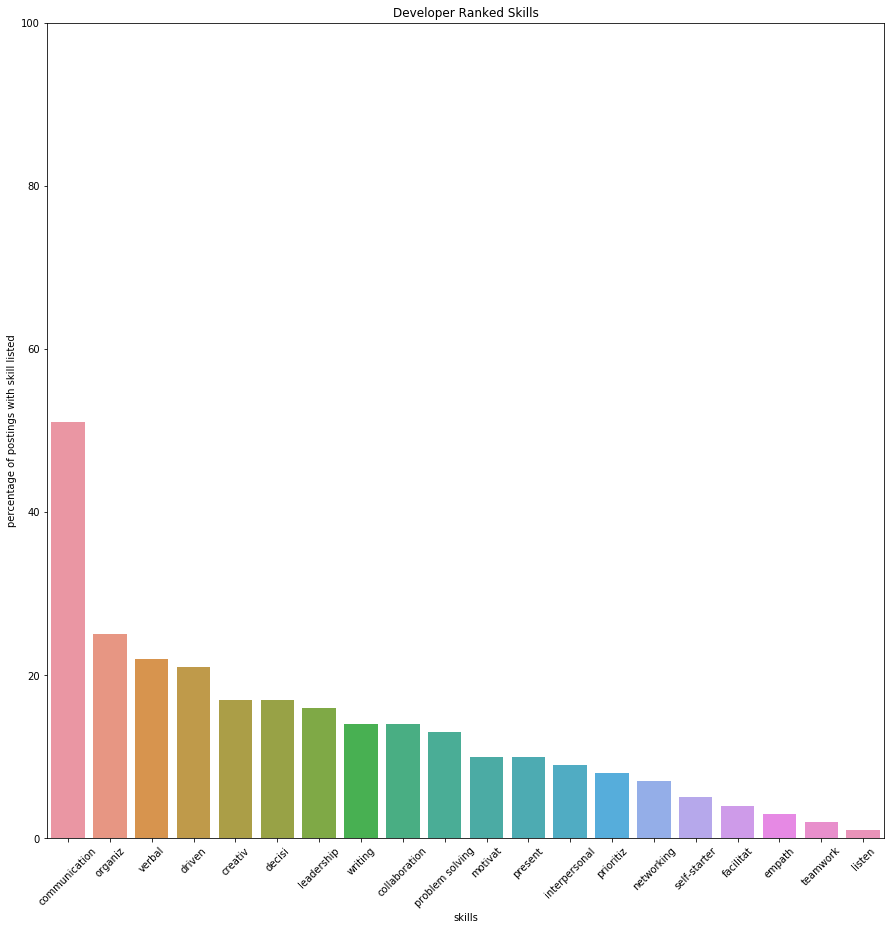

In [191]:
df_dev = df_perc.loc['developer'].sort_values(ascending=False).head(20)
df_dev = df_dev.reset_index()

print(df_dev)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='developer', ax=ax, data=df_dev)
plt.xticks(rotation=45);
plt.title('Developer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

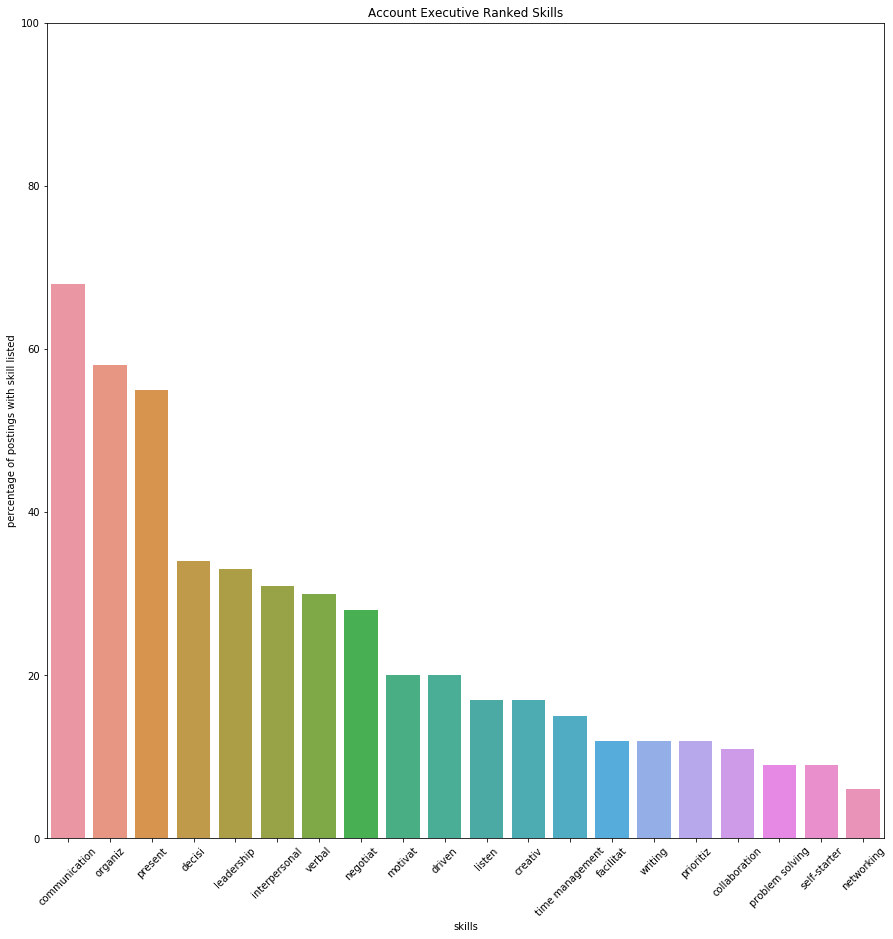

In [192]:
df_ae = df_perc.loc['account_executive'].sort_values(ascending=False).head(20)
df_ae = df_ae.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='account_executive', ax=ax, data=df_ae)
plt.xticks(rotation=45);
plt.title('Account Executive Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

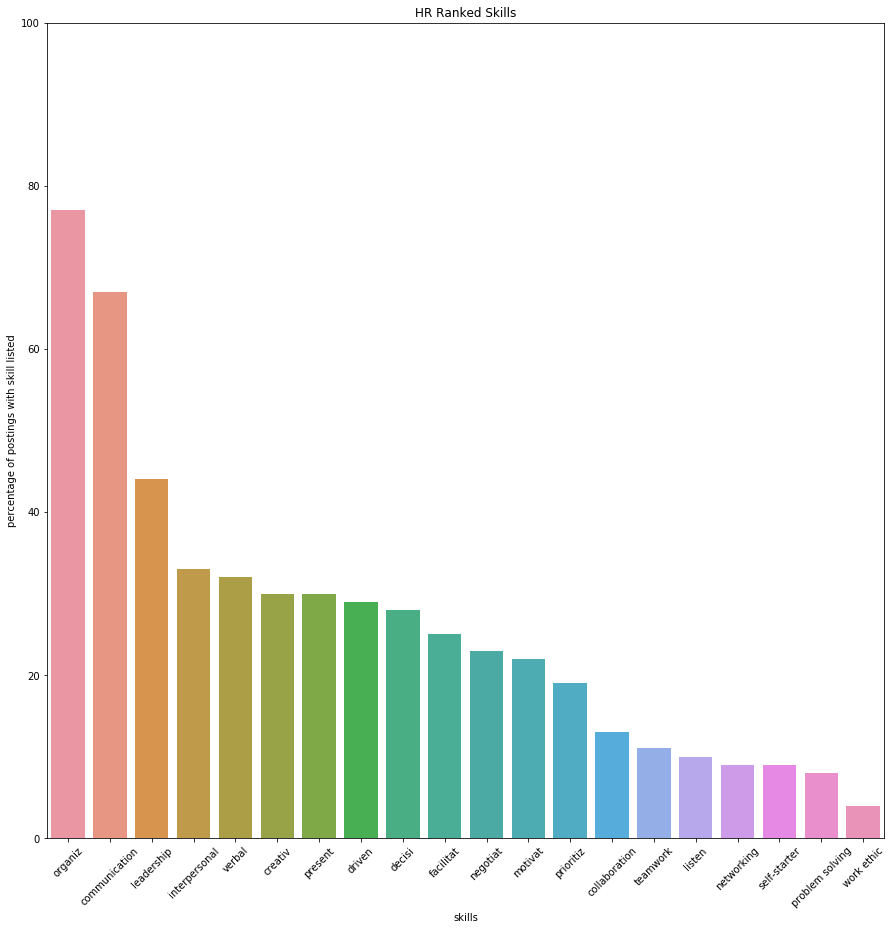

In [193]:
df_hr = df_perc.loc['human_resources'].sort_values(ascending=False).head(20)
df_hr = df_hr.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='human_resources', ax=ax, data=df_hr)
plt.xticks(rotation=45);
plt.title('HR Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

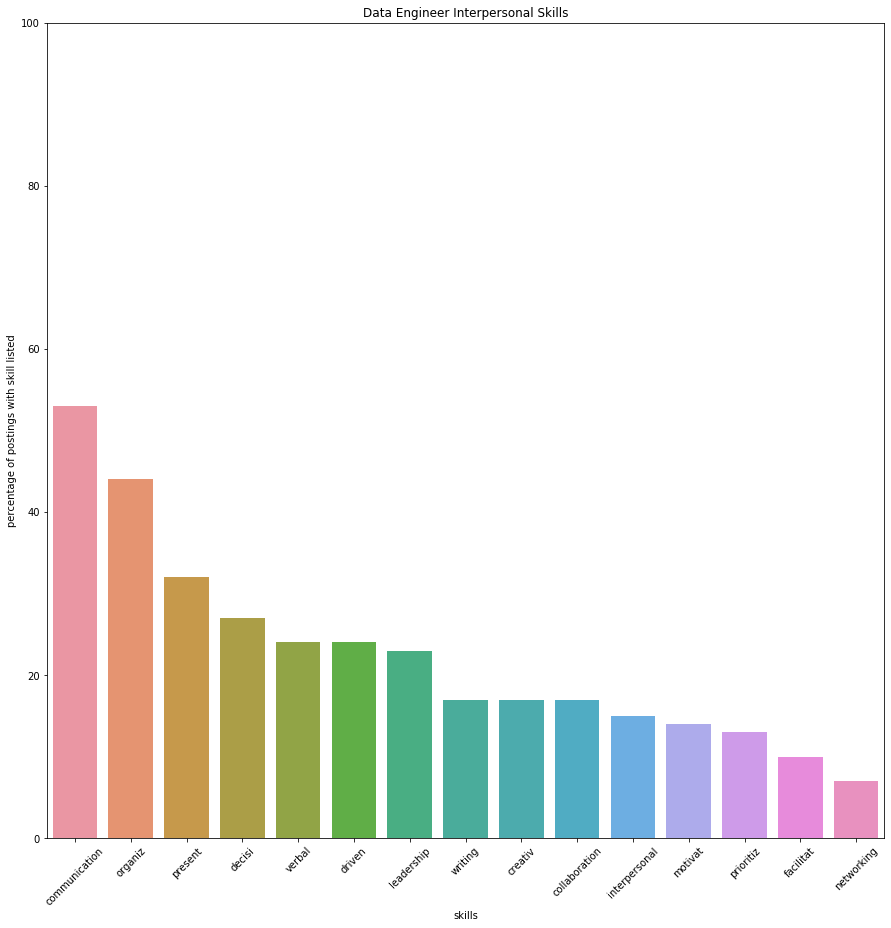

In [194]:
df_de = df_perc.loc['data_engineer'].sort_values(ascending=False).head(15)
df_de = df_de.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='data_engineer', ax=ax, data=df_de)
plt.xticks(rotation=45);
plt.title('Data Engineer Interpersonal Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

In [125]:
df.groupby('job').count()

,role,company,description,leadership,public speaking,present,writing,negotiat,problem solving,hypothesis,...,networking,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
job,,,,,,,,,,,,,,,,,,,,,
account_executive,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
business_analyst,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
consultant,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
customer_success,303,303,303,303,303,303,303,303,303,303,...,303,303,303,303,303,303,303,303,303,303
data_analyst,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
data_engineer,270,270,270,270,270,270,270,270,270,270,...,270,270,270,270,270,270,270,270,270,270
data_scientist,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
developer,166,166,166,166,166,166,166,166,166,166,...,166,166,166,166,166,166,166,166,166,166
human_resources,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84


In [126]:
df.groupby('job').sum()

,leadership,public speaking,present,writing,negotiat,problem solving,hypothesis,decisi,communication,emotional intelligence,...,networking,time management,motivat,critical thinking,story telling,verbal,listen,organiz,prioritiz,interpersonal
job,,,,,,,,,,,,,,,,,,,,,
account_executive,21,3,35,8,18,6,0,22,43,0,...,4,10,13,0,0,19,11,37,8,20
business_analyst,31,0,27,8,7,15,0,30,66,1,...,0,8,21,6,0,28,6,48,24,19
consultant,69,2,90,35,20,25,1,46,133,1,...,5,12,41,3,0,67,20,128,33,39
customer_success,118,3,133,39,42,28,1,87,182,2,...,24,24,92,5,0,73,39,201,62,53
data_analyst,15,0,20,11,4,8,1,28,47,0,...,2,7,9,6,0,23,7,35,17,10
data_engineer,64,3,89,47,6,20,3,73,144,7,...,19,10,39,6,0,66,6,121,36,42
data_scientist,28,0,27,6,5,8,2,32,31,0,...,1,1,13,2,0,10,0,27,12,2
developer,28,0,17,24,2,23,1,29,85,0,...,12,2,17,1,0,37,2,43,14,15
human_resources,37,1,26,2,20,7,0,24,57,2,...,8,4,19,2,0,27,9,65,16,28


In [129]:
df_perc = (df.groupby('job').sum()/df.groupby('job').count())*100

In [138]:
df_perc = df_perc.fillna(0).astype(int)
df_perc.drop(['role', 'description'], axis=1, inplace=True)
df_perc.reset_index()

,job,collaboration,communication,company,creativ,critical thinking,decisi,driven,emotional intelligence,empath,...,prioritiz,problem solving,public speaking,self-starter,story telling,teamwork,time management,verbal,work ethic,writing
0,account_executive,11,68,0,17,0,34,20,0,0,...,12,9,4,9,0,3,15,30,3,12
1,business_analyst,17,77,0,17,7,35,23,1,1,...,28,17,0,9,0,1,9,32,3,9
2,consultant,11,64,0,21,1,22,17,0,1,...,16,12,0,5,0,3,5,32,4,16
3,customer_success,18,60,0,22,1,28,26,0,5,...,20,9,0,10,0,7,7,24,8,12
4,data_analyst,14,68,0,11,8,40,18,0,0,...,24,11,0,5,0,1,10,33,1,15
5,data_engineer,17,53,0,17,2,27,24,2,5,...,13,7,1,6,0,3,3,24,2,17
6,data_scientist,18,47,0,16,3,49,29,0,1,...,18,12,0,6,0,7,1,15,1,9
7,developer,14,51,0,17,0,17,21,0,3,...,8,13,0,5,0,2,1,22,0,14
8,human_resources,13,67,0,30,2,28,29,2,4,...,19,8,1,9,0,11,4,32,4,2
9,product_manager,36,78,0,24,2,48,44,0,14,...,44,8,2,8,0,5,0,34,2,13


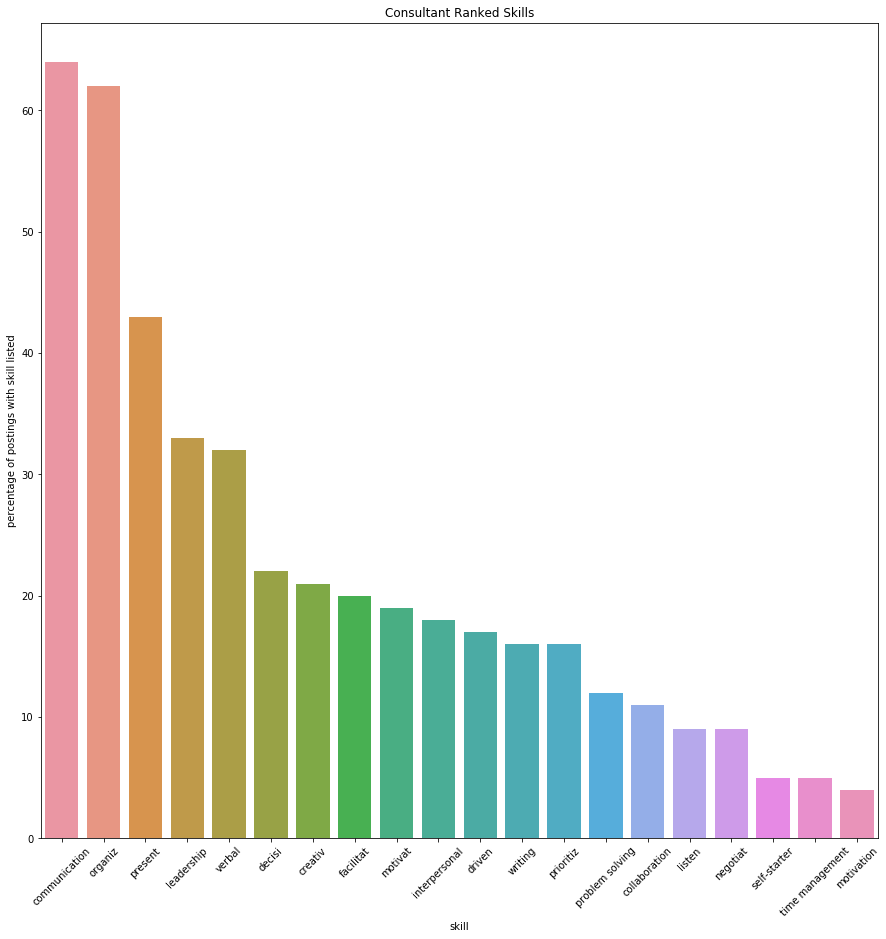

In [195]:
df_c = df_perc.loc['consultant'].sort_values(ascending=False).head(20)
df_c = df_c.reset_index()


a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='consultant', ax=ax, data=df_c)
plt.xticks(rotation=45);
plt.title('Consultant Ranked Skills')
ax.set(xlabel='skill', ylabel='percentage of postings with skill listed');